In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, AvgPool2D , BatchNormalization, MaxPooling2D
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 16.00 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [20]:
DATA_PATH = '/content/Sign-Language-Digits-Dataset/Dataset'

In [21]:
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for number in numbers:
    #create directory for test data as number_Test
    path = DATA_PATH + '/' + number + '_Test'
    if  not os.path.exists(path):
        os.mkdir(path)

In [22]:
for number in numbers:
    path = DATA_PATH + '/' + number
    num_files = len(os.listdir(path))
    test_path = DATA_PATH + '/' + number + '_Test'
    indices_taken = np.random.choice(num_files, int(num_files*0.2), replace=False)
    for i in range(len(os.listdir(path))):
        if i in indices_taken:
            shutil.copy(path+"/"+os.listdir(path)[i], test_path)
    for file in os.listdir(test_path):
        if file in os.listdir(path):
            os.remove(path+"/"+file)

In [23]:
os.mkdir(DATA_PATH+"/"+"Train")
os.mkdir(DATA_PATH+"/"+"Test")

In [24]:
for number in numbers:
    path = DATA_PATH + '/' + number + '_Test'
    to_path = DATA_PATH+ "/" + "Test"
    shutil.move(path,to_path)

In [25]:
for number in numbers:
    path = DATA_PATH + '/' + number
    to_path = DATA_PATH+ "/" + "Train"
    shutil.move(path,to_path)

In [26]:
for number in numbers:
    path = DATA_PATH + "/" + "Test" + "/" + number + "_Test"
    #remove all files from test directory to numbers
    new_name = path.replace("_Test",'')
    os.rename(path, new_name)

In [27]:
TRAIN_PATH = DATA_PATH + "/" + "Train"
TEST_PATH = DATA_PATH + "/" + "Test"

In [28]:
#### only for RGB
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(

        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
import glob
for num_of_folder in range (0,10):
  list_of_files = glob.glob(f'/content/Sign-Language-Digits-Dataset/Dataset/Train/{num_of_folder}/*.JPG')
  for file in list_of_files:
    img = load_img(file)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)

    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    i = 0

    for batch in datagen.flow(x, batch_size=1,
                            save_to_dir=f'/content/Sign-Language-Digits-Dataset/Dataset/Train/{num_of_folder}', save_prefix='cat', save_format='JPG'):

      i += 1

      if i > 3:

          break  # otherwise the generator would loop indefinitely

In [29]:
# read from train path 
import cv2
path = '/content/Sign-Language-Digits-Dataset/Dataset/Train'
img_dict = dict()

for root, dirs, files in os.walk(path):
    print(os.path.basename(root))
    my_key = os.path.basename(root)
    dir_images = []
    for file_ in files :
      # if root != "/content/Sign-Language-Digits-Dataset/Dataset/Train/9":
        full_file_path = os.path.join(root, file_)
        img = cv2.imread(full_file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # resize image
        img = cv2.resize(img, (100,100), interpolation = cv2.INTER_AREA)
        dir_images.append(img)
    img_dict[my_key] = dir_images

Train
4
0
3
8
6
5
9
2
1
7


In [30]:
print(list(img_dict.keys())[1:])
length = []
for i in range(0,10):
  length.append(len(img_dict[str(i)]))
y_train = []
for i in list(img_dict.keys())[1:]:
  for x in range(length[int(i)]):
    y_train.append(int(i))
y_train = np.array(y_train)
len(y_train)

['4', '0', '3', '8', '6', '5', '9', '2', '1', '7']


8054

In [31]:
y_train

array([4, 4, 4, ..., 7, 7, 7])

In [32]:
# convert dict into array of arrays 
x_train = np.array([np.array(item) for item in img_dict.values()])
x_train[1].shape 

<ipython-input-32-260e3c421d6a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array([np.array(item) for item in img_dict.values()])


(805, 100, 100, 3)

In [33]:
x_train = np.vstack(x_train[1:])
x_train

array([[[[104, 104, 106],
         [109, 109, 111],
         [115, 115, 117],
         ...,
         [161, 163, 175],
         [160, 162, 174],
         [159, 161, 173]],

        [[106, 106, 108],
         [110, 110, 112],
         [116, 116, 118],
         ...,
         [161, 163, 175],
         [160, 162, 174],
         [159, 161, 173]],

        [[108, 108, 110],
         [112, 112, 114],
         [117, 117, 119],
         ...,
         [161, 163, 175],
         [160, 162, 174],
         [159, 161, 173]],

        ...,

        [[173, 174, 176],
         [140, 140, 140],
         [ 63,  62,  58],
         ...,
         [174, 178, 189],
         [174, 178, 189],
         [174, 178, 189]],

        [[170, 171, 173],
         [130, 130, 130],
         [ 45,  44,  40],
         ...,
         [173, 177, 188],
         [173, 177, 188],
         [173, 177, 188]],

        [[167, 168, 170],
         [121, 121, 121],
         [ 28,  27,  23],
         ...,
         [172, 176, 187],
        

In [34]:
print(x_train.shape)
print(np.array(y_train).shape)

(8054, 100, 100, 3)
(8054,)


In [35]:
# read from train path 
import cv2
path = '/content/Sign-Language-Digits-Dataset/Dataset/Test'
test_dict = dict()

for root, dirs, files in os.walk(path):
    print(os.path.basename(root))
    my_key = os.path.basename(root)
    dir_images = []
    for file_ in files :
      # if root != "/content/Sign-Language-Digits-Dataset/Dataset/Train/9":
        full_file_path = os.path.join(root, file_)
        img = cv2.imread(full_file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # resize image
        img = cv2.resize(img, (100,100), interpolation = cv2.INTER_AREA)
        dir_images.append(img)
    test_dict[my_key] = dir_images

Test
4
0
3
8
6
5
9
2
1
7


In [36]:
print(list(test_dict.keys())[1:])
length = []
for i in range(0,10):
  length.append(len(test_dict[str(i)]))
y_test = []
for i in list(test_dict.keys())[1:]:
  for x in range(length[int(i)]):
    y_test.append(int(i))
y_test = np.array(y_test)
len(y_test)

['4', '0', '3', '8', '6', '5', '9', '2', '1', '7']


409

In [37]:
# convert dict into array of arrays 
x_test = np.array([np.array(item) for item in test_dict.values()])
x_test.shape 

<ipython-input-37-99f2136b39a3>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array([np.array(item) for item in test_dict.values()])


(11,)

In [38]:
x_test = np.vstack(x_test[1:])
x_test

array([[[[126, 129, 136],
         [128, 131, 138],
         [130, 133, 142],
         ...,
         [112, 112, 112],
         [110, 110, 110],
         [109, 109, 109]],

        [[127, 130, 137],
         [129, 132, 139],
         [131, 134, 143],
         ...,
         [113, 113, 113],
         [111, 111, 111],
         [110, 110, 110]],

        [[129, 132, 139],
         [131, 134, 141],
         [133, 136, 145],
         ...,
         [115, 115, 115],
         [112, 112, 112],
         [110, 110, 110]],

        ...,

        [[117, 118, 122],
         [118, 119, 123],
         [120, 121, 125],
         ...,
         [109, 109, 107],
         [107, 107, 105],
         [106, 106, 104]],

        [[114, 115, 119],
         [116, 117, 121],
         [117, 118, 122],
         ...,
         [107, 107, 105],
         [105, 105, 103],
         [104, 104, 102]],

        [[112, 113, 117],
         [113, 114, 118],
         [115, 116, 120],
         ...,
         [106, 106, 104],
        

In [39]:
print(x_test.shape)
print(np.array(y_test).shape)

(409, 100, 100, 3)
(409,)


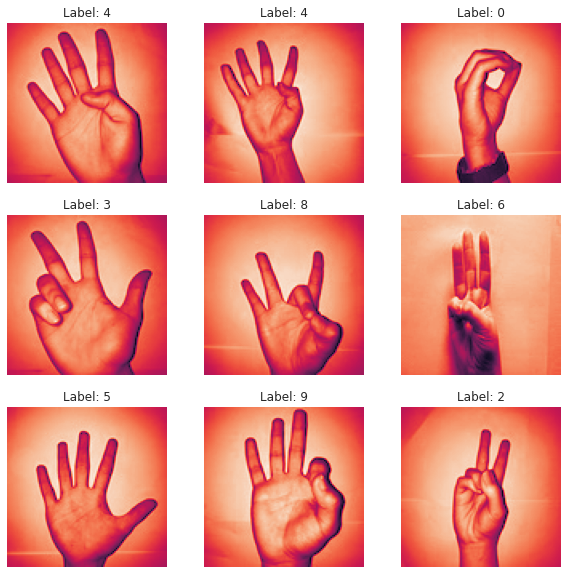

In [40]:
# plot rgb images
def visualize_image(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image[:,:,0])
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image(x_test[i*40], label="Label: " + str(y_test[i*40]))

In [41]:
# convert array of float into array of integers 
# y_train = np.array([int(x) for x in y_train ])
# y_test = np.array([int(x) for x in y_test ])
print (x_train[:,:,:,0][0][0])
x_train = x_train.astype(np.float64) 

[104 109 115 120 123 125 127 128 131 132 133 135 137 140 143 144 147 149
 151 153 153 154 155 157 159 159 161 162 162 163 164 165 168 169 171 173
 175 176 176 176 178 178 178 179 179 180 180 180 184 184 184 183 183 182
 182 182 182 183 184 185 186 187 187 185 182 181 183 182 184 183 185 185
 182 181 182 178 177 173 172 170 171 171 171 170 170 169 169 169 170 170
 169 168 166 165 164 164 162 161 160 159]


In [42]:
x_test = x_test.astype(np.float64) 

In [43]:
# calculate average for all images
averages = []
total = 0
n= 0
red_channel = x_train[:,:,:,0]
grean_channel = x_train[:,:,:,1]
blue_channel = x_train[:,:,:,2]


average_red_channel = np.sum(red_channel)/(len(x_train)*100*100)
average_grean_channel = np.sum(grean_channel)/(len(x_train)*100*100)
average_blue_channel = np.sum(blue_channel)/(len(x_train)*100*100)
print (average_blue_channel, '\n',average_grean_channel,'\n',average_red_channel)


158.4602383536131 
 166.48928069282343 
 174.37743496399304


In [44]:
x_train[:,:,:,1] 

array([[[104., 109., 115., ..., 163., 162., 161.],
        [106., 110., 116., ..., 163., 162., 161.],
        [108., 112., 117., ..., 163., 162., 161.],
        ...,
        [174., 140.,  62., ..., 178., 178., 178.],
        [171., 130.,  44., ..., 177., 177., 177.],
        [168., 121.,  27., ..., 176., 176., 176.]],

       [[162., 163., 165., ..., 176., 175., 174.],
        [165., 166., 168., ..., 176., 175., 174.],
        [168., 169., 171., ..., 175., 174., 174.],
        ...,
        [ 77.,  77.,  76., ..., 127., 128., 129.],
        [ 76.,  76.,  74., ..., 126., 127., 128.],
        [ 75.,  74.,  73., ..., 125., 126., 127.]],

       [[111., 111., 111., ..., 165., 164., 163.],
        [111., 111., 111., ..., 165., 164., 163.],
        [111., 111., 111., ..., 166., 164., 163.],
        ...,
        [132., 132., 132., ..., 203., 202., 201.],
        [131., 131., 130., ..., 202., 201., 199.],
        [129., 129., 129., ..., 200., 199., 198.]],

       ...,

       [[146., 146., 147

In [45]:
x_train[:,:,:,0] = x_train[:,:,:,0]  - average_red_channel
x_train[:,:,:,1] = x_train[:,:,:,1]  - average_grean_channel
x_train[:,:,:,2] = x_train[:,:,:,2]  - average_blue_channel
x_train

array([[[[ -70.37743496,  -62.48928069,  -52.46023835],
         [ -65.37743496,  -57.48928069,  -47.46023835],
         [ -59.37743496,  -51.48928069,  -41.46023835],
         ...,
         [ -13.37743496,   -3.48928069,   16.53976165],
         [ -14.37743496,   -4.48928069,   15.53976165],
         [ -15.37743496,   -5.48928069,   14.53976165]],

        [[ -68.37743496,  -60.48928069,  -50.46023835],
         [ -64.37743496,  -56.48928069,  -46.46023835],
         [ -58.37743496,  -50.48928069,  -40.46023835],
         ...,
         [ -13.37743496,   -3.48928069,   16.53976165],
         [ -14.37743496,   -4.48928069,   15.53976165],
         [ -15.37743496,   -5.48928069,   14.53976165]],

        [[ -66.37743496,  -58.48928069,  -48.46023835],
         [ -62.37743496,  -54.48928069,  -44.46023835],
         [ -57.37743496,  -49.48928069,  -39.46023835],
         ...,
         [ -13.37743496,   -3.48928069,   16.53976165],
         [ -14.37743496,   -4.48928069,   15.53976165],
  

In [46]:
# calculate average for all images
averages = []
total = 0
n= 0
red_channel = x_test[:,:,:,0]
grean_channel = x_test[:,:,:,1]
blue_channel = x_test[:,:,:,2]


average_red_channel = np.sum(red_channel)/(len(x_test)*100*100)
average_grean_channel = np.sum(grean_channel)/(len(x_test)*100*100)
average_blue_channel = np.sum(blue_channel)/(len(x_test)*100*100)
print (average_blue_channel, '\n',average_grean_channel,'\n',average_red_channel)
x_test[:,:,:,0] = x_test[:,:,:,0]  - average_red_channel
x_test[:,:,:,1] = x_test[:,:,:,1]  - average_grean_channel
x_test[:,:,:,2] = x_test[:,:,:,2]  - average_blue_channel
x_test

157.34858288508556 
 164.97090953545234 
 172.43432518337409


array([[[[-46.43432518, -35.97090954, -21.34858289],
         [-44.43432518, -33.97090954, -19.34858289],
         [-42.43432518, -31.97090954, -15.34858289],
         ...,
         [-60.43432518, -52.97090954, -45.34858289],
         [-62.43432518, -54.97090954, -47.34858289],
         [-63.43432518, -55.97090954, -48.34858289]],

        [[-45.43432518, -34.97090954, -20.34858289],
         [-43.43432518, -32.97090954, -18.34858289],
         [-41.43432518, -30.97090954, -14.34858289],
         ...,
         [-59.43432518, -51.97090954, -44.34858289],
         [-61.43432518, -53.97090954, -46.34858289],
         [-62.43432518, -54.97090954, -47.34858289]],

        [[-43.43432518, -32.97090954, -18.34858289],
         [-41.43432518, -30.97090954, -16.34858289],
         [-39.43432518, -28.97090954, -12.34858289],
         ...,
         [-57.43432518, -49.97090954, -42.34858289],
         [-60.43432518, -52.97090954, -45.34858289],
         [-62.43432518, -54.97090954, -47.34858289]],

In [47]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(8054, 100, 100, 3)
(8054,)
(409, 100, 100, 3)
(409,)


In [31]:
from sklearn.model_selection import KFold

acc_per_fold = []
loss_per_fold = []
num_folds = 3
fixed = 3
# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

def create_model_3(num_folds, fixed):
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=num_folds, shuffle=True)

  model = Sequential()
  for train, test in kfold.split(inputs, targets):
      model = Sequential([
          tf.keras.layers.Input(shape=(100,100,3)),
          tf.keras.layers.Lambda(lambda x: x/255.0),
          Conv2D(64,(9,9),padding = 'same'),
          Dropout(0.1),
          Conv2D(32,(5,5)),
          MaxPool2D((3,3)),
          BatchNormalization(),
          Conv2D(16,(3,3)),
          AvgPool2D((3,3)),
          Conv2D(4,(3,3),padding = 'same'),
          MaxPool2D((3,3)),
          Flatten(),
          Dense(64,activation = 'linear'),
          Dense(32,activation = 'tanh'),
          Dense(16,activation = 'relu'),
          Dense(10,activation = 'softmax')
          ])
      model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
      )
      # Generate a print
      print('------------------------------------------------------------------------')
      print(f'Training for fold {num_folds- (fixed-1)} ...')
      history = model.fit(inputs[train], targets[train],
                batch_size= 32,
                epochs= 100
          # validation_data=(inputs[test], targets[test])
      )

      # Generate generalization metrics
      scores = model.evaluate(inputs[test], targets[test], verbose=0)
      print(f'Score for fold {num_folds- (fixed-1)}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
      acc_per_fold.append(scores[1] * 100)
      loss_per_fold.append(scores[0])

      # Increase fold number
      num_olds = num_folds + 1
  return model  

model_3 = create_model_3(num_folds, fixed)
print (f"total scores for k-fold -->  {acc_per_fold}")
print (f"total losses for k-fold -->  {loss_per_fold}")
score = sum(acc_per_fold)/num_folds
loss = sum(loss_per_fold)/num_folds
print (f"ِaverage accuracy -->  {score}")
print (f"ِaverage loss -->  {loss}")
model_3.save('model_3_rgb.h5')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
177/177 [==============================] - 16s 38ms/step - loss: 2.2404 - accuracy: 0.1642
Epoch 2/100
177/177 [==============================] - 6s 37ms/step - loss: 2.0674 - accuracy: 0.2631
Epoch 3/100
177/177 [==============================] - 6s 37ms/step - loss: 1.9160 - accuracy: 0.3482
Epoch 4/100
177/177 [==============================] - 7s 37ms/step - loss: 1.7768 - accuracy: 0.3972
Epoch 5/100
177/177 [==============================] - 7s 37ms/step - loss: 1.6549 - accuracy: 0.4362
Epoch 6/100
177/177 [==============================] - 7s 37ms/step - loss: 1.5542 - accuracy: 0.4715
Epoch 7/100
177/177 [==============================] - 7s 37ms/step - loss: 1.4321 - accuracy: 0.5122
Epoch 8/100
177/177 [==============================] - 7s 37ms/step - loss: 1.3846 - accuracy: 0.5285
Epoch 9/100
177/177 [==============================] - 7s 37ms/step - loss: 1.2853 - a

In [35]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

13/13 [==============================] - 0s 14ms/step
Test Loss: 0.16093
Test Accuracy: 96.33%


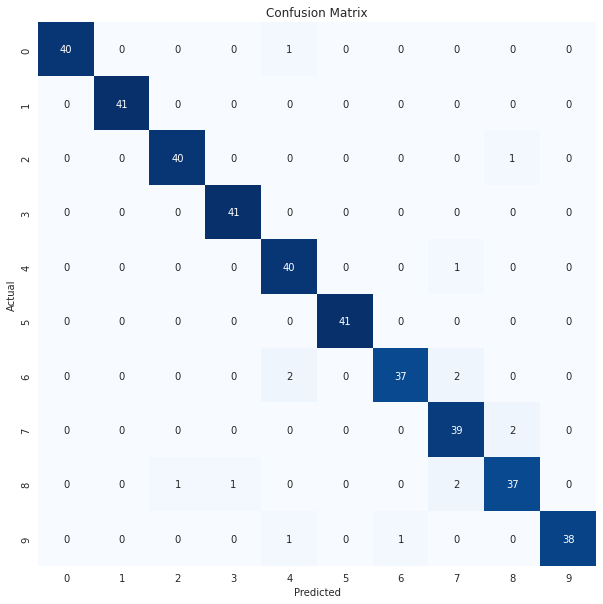

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       1.00      1.00      1.00        41
           2       0.98      0.98      0.98        41
           3       0.98      1.00      0.99        41
           4       0.91      0.98      0.94        41
           5       1.00      1.00      1.00        41
           6       0.97      0.90      0.94        41
           7       0.89      0.95      0.92        41
           8       0.93      0.90      0.91        41
           9       1.00      0.95      0.97        40

    accuracy                           0.96       409
   macro avg       0.96      0.96      0.96       409
weighted avg       0.96      0.96      0.96       409



In [36]:
evaluate_model(model_3, x_test, y_test)

13/13 [==============================] - 0s 16ms/step


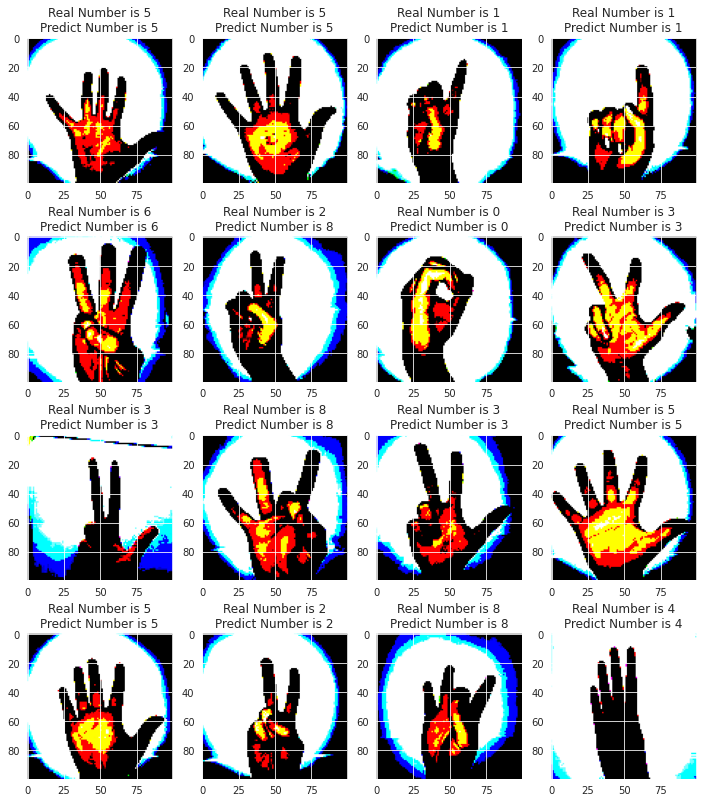

In [40]:
# Predict the value from the validation dataset
Y_pred = model_3.predict(x_test)
# Convert Predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
fig , axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    i = np.random.randint(0,400)
    ax.imshow(x_test[i], cmap = 'Accent')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {Y_pred[i].argmax()}");

In [48]:
# logistic regression 
numImages = x_train.shape[0]
flattened_training = np.array([x_train[i].flatten() for i in range(numImages)])
numImages = x_test.shape[0]
flattened_testing = np.array([x_test[i].flatten() for i in range(numImages)])
print (f"flattened of train data -> {flattened_training.shape}")
print (f"flattened of test data -> {flattened_testing.shape}")

flattened of train data -> (8054, 30000)
flattened of test data -> (409, 30000)


In [49]:

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
print (y_train.shape)
print (y_test.shape)

(8054, 1)
(409, 1)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
# logisticRegr.fit(flattened_training, y_train)
scores = cross_val_score(logisticRegr, flattened_training, y_train, cv=5)
scores 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

array([0.23339541, 0.21166977, 0.21042831, 0.22470515, 0.23229814])

In [53]:
# Use score method to get accuracy of model
logisticRegr.fit(flattened_training, y_train)
score = logisticRegr.score(flattened_testing, y_test)
print(score)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3422982885085575


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn import metrics
predictions = logisticRegr.predict(flattened_testing)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[26  1  0  0  0  1  5  4  3  1]
 [ 0 21  6  4  0  0  0  2  6  2]
 [ 4  4  8  8  3  0  3  9  1  1]
 [ 0  4  0 18  1  4  1  2  7  4]
 [ 0  3  2  3 10  6  3  7  6  1]
 [ 1  0  1  5  1 14  2  4  6  7]
 [ 2  0  3  4  8  2 11  4  5  2]
 [ 1  2  5  2  8  1  5  9  3  5]
 [ 2  2  2  2  5  2  4  5 10  7]
 [ 0  5  1  2  2  6  1  4  6 13]]


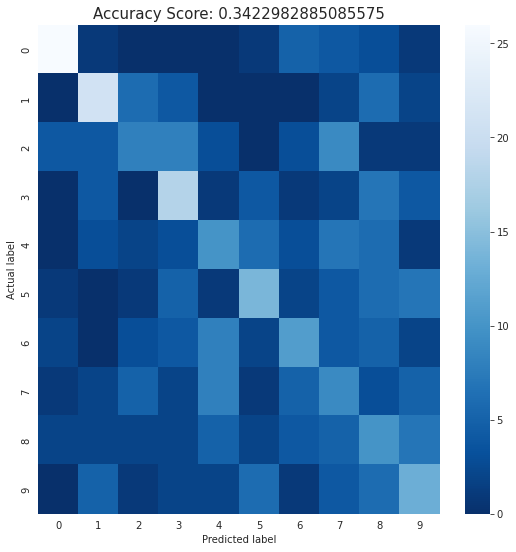

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);